### **FIFA 2021 Messy Dataset**

**Import Relevant Libraries**

In [378]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import plotly.express as px

In [379]:
data = pd.read_csv(r"D:\Data Analytics\PortfolioProjects\fifa-2021.csv", low_memory=False)
df = data.copy()

In [380]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [382]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

### **The dataset is extremely messy. First, lets do some data cleaning**

**Dropping the unnecessary Columns**

In [383]:
df.drop(columns = ['photoUrl','playerUrl','Loan Date End','Name'], inplace = True)

In [384]:
df.rename(columns={'LongName': 'FullName', '↓OVA': 'Overall Rating', 'POT': 'Potential Rating'}, inplace=True)

**Converting Height Column into Numeric and all data into cm**

In [385]:
def convert_height(height):
    feet_inches_pattern = re.compile(r'(\d)\'(\d+)"')

    feet_inches_match = feet_inches_pattern.match(height)
    if feet_inches_match:
        feet = int(feet_inches_match.group(1))
        inches = int(feet_inches_match.group(2))
        cm = feet * 30.48 + inches * 2.54
        return cm

    cm_pattern = re.compile(r'(\d+)cm')
    cm_match = cm_pattern.match(height)
    if cm_match:
        return int(cm_match.group(1))

    try:
        return float(height)
    except ValueError:
        return None

df['Height'] = df['Height'].apply(convert_height)

In [386]:
df['Height'].head()

0    170.0
1    187.0
2    188.0
3    181.0
4    175.0
Name: Height, dtype: float64

**Converting Weight Column into Numeric and all the  data into kg**

In [387]:
def convert_weight(weight):
    kg_pattern = re.compile(r'(\d+)kg')
    kg_match = kg_pattern.match(weight)
    if kg_match:
        return int(kg_match.group(1))

    lbs_pattern = re.compile(r'(\d+)lbs')
    lbs_match = lbs_pattern.match(weight)
    if lbs_match:
        lbs = int(lbs_match.group(1))
        kg = lbs * 0.453592  
        return round(kg, 2)  

    try:
        return float(weight)
    except ValueError:
        return None

df['Weight'] = df['Weight'].apply(convert_weight)


In [388]:
df['Weight'].head()

0    72.0
1    83.0
2    87.0
3    70.0
4    68.0
Name: Weight, dtype: float64

**Remove the unnecessary newline characters from all columns that have them.**

In [389]:
def remove_newlines(text):
    if isinstance(text, str):
        return text.replace('\n', ' ')
    return text

df = df.applymap(remove_newlines)


**Convert 'Value', 'Wage' and 'Clause' format to numeric**

In [390]:
def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value == '€0':
        return 0
    else:
        return float(value[1:])

df['Value'] = df['Value'].apply(convert_value)

def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value == '€0':
        return 0
    else:
        return float(value[1:])

df['Wage'] = df['Wage'].apply(convert_value)

def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value == '€0':
        return 0
    else:
        return float(value[1:])

df['Release Clause'] = df['Release Clause'].apply(convert_value)

In [391]:
print(df['Value'].head())

0    103500000.0
1     63000000.0
2    120000000.0
3    129000000.0
4    132000000.0
Name: Value, dtype: float64


In [392]:
print(df['Wage'].head())

0    560000.0
1    220000.0
2    125000.0
3    370000.0
4    270000.0
Name: Wage, dtype: float64


In [393]:
print(df['Release Clause'].head())

0    138400000.0
1     75900000.0
2    159400000.0
3    161000000.0
4    166500000.0
Name: Release Clause, dtype: float64


**Find columns with 'star' characters**

In [394]:
columns_with_stars = []
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str) and '*' in x).any():
        columns_with_stars.append(col)

print("Columns with star characters:", columns_with_stars)

Columns with star characters: []


**Hence, There are not any.**

**Convert 'Hits' column to float64 and replace nulls with zeros**

In [395]:
df['Hits'] = pd.to_numeric(df['Hits'], errors='coerce').fillna(0)

In [396]:
df.columns

Index(['ID', 'FullName', 'Nationality', 'Age', 'Overall Rating',
       'Potential Rating', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Value', 'Wage',
       'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits'],
      dtype

## **Data Visualization/Exploration**

**Separating the Joined Column into Year, Month and Day Columns**

In [397]:
df['Joined'] = pd.to_datetime(df['Joined'])

df['Year'] = df['Joined'].dt.year
df['Month'] = df['Joined'].dt.month
df['Day'] = df['Joined'].dt.day

columns_to_display = ['Joined', 'Day', 'Month', 'Year']
formatted_df = df[columns_to_display].copy()

formatted_df['Joined'] = formatted_df['Joined'].dt.strftime('%Y-%m-%d')

print(formatted_df.head().to_string(index=False))

    Joined  Day  Month  Year
2004-07-01    1      7  2004
2018-07-10   10      7  2018
2014-07-16   16      7  2014
2015-08-30   30      8  2015
2017-08-03    3      8  2017


**Checking All the players that have been playing for more than 10 years.**

In [398]:
df['Joined'] = pd.to_datetime(df['Joined'])

current_date = datetime.now()
df['YearsOfService'] = (current_date - df['Joined']).dt.days / 365.25

players_more_than_10_years = df[df['YearsOfService'] > 10]
number_of_players = players_more_than_10_years.shape[0]

print(f"Number of players with more than 10 years of service: {number_of_players}")

Number of players with more than 10 years of service: 1080


In [ ]:
from tabulate import tabulate

# Sorting top players by Market Value and Potential Rating
top_players_by_value = df[['FullName', 'Value', 'Potential Rating']].sort_values(by='Value', ascending=False).head(10)
top_players_by_potential = df[['FullName', 'Value', 'Potential Rating']].sort_values(by='Potential Rating', ascending=False).head(10)

# Resetting index for proper numbering
top_players_by_value.reset_index(drop=True, inplace=True)
top_players_by_potential.reset_index(drop=True, inplace=True)

# Printing the results in a neat table without formatting
print("Top 10 Players by Market Value:")
print(tabulate(top_players_by_value[['FullName', 'Value']], headers=['Rank', 'FullName', 'Value'], showindex=True, tablefmt='fancy_grid'))

print("\nTop 10 Players by Potential Rating:")
print(tabulate(top_players_by_potential[['FullName', 'Potential Rating']], headers=['Rank', 'FullName', 'Potential Rating'], showindex=True, tablefmt='fancy_grid'))


Top 10 Players by Market Value:
╒════════╤════════════════════════════╤═══════════╕
│   Rank │ FullName                   │     Value │
╞════════╪════════════════════════════╪═══════════╡
│      0 │ Kylian Mbappé              │ 1.855e+08 │
├────────┼────────────────────────────┼───────────┤
│      1 │ Neymar da Silva Santos Jr. │ 1.32e+08  │
├────────┼────────────────────────────┼───────────┤
│      2 │ Kevin De Bruyne            │ 1.29e+08  │
├────────┼────────────────────────────┼───────────┤
│      3 │ Jadon Sancho               │ 1.24e+08  │
├────────┼────────────────────────────┼───────────┤
│      4 │ Kai Havertz                │ 1.21e+08  │
├────────┼────────────────────────────┼───────────┤
│      5 │ Mohamed Salah              │ 1.205e+08 │
├────────┼────────────────────────────┼───────────┤
│      6 │ Sadio Mané                 │ 1.205e+08 │
├────────┼────────────────────────────┼───────────┤
│      7 │ Jan Oblak                  │ 1.2e+08   │
├────────┼──────────────────────

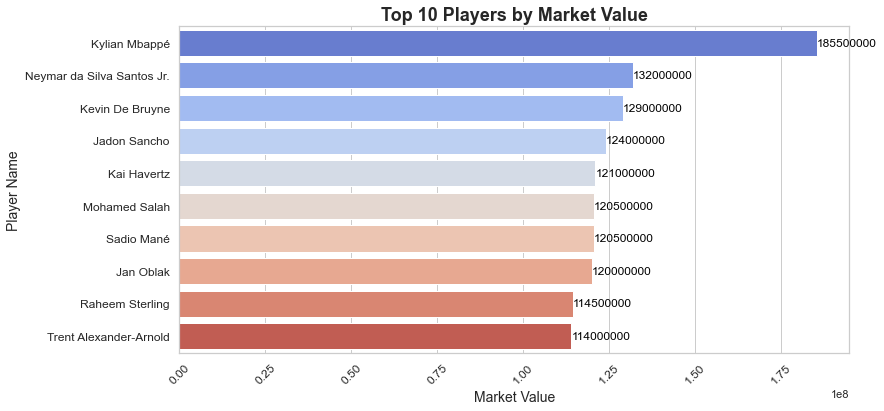

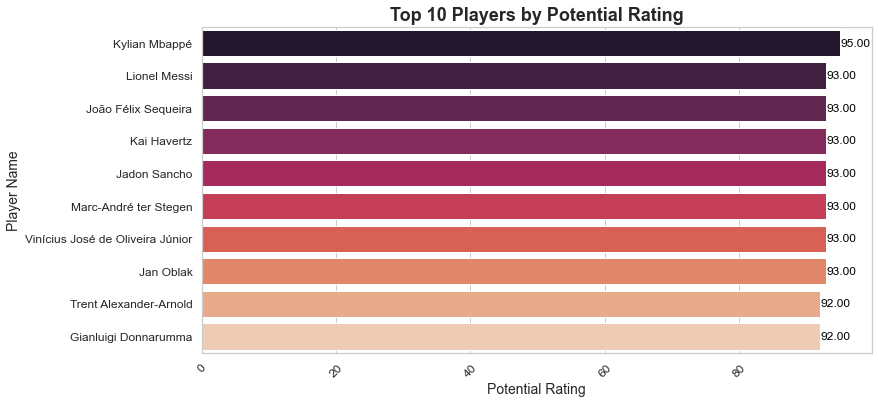

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Sorting top players by Market Value and Potential Rating
top_players_by_value = df[['FullName', 'Value', 'Potential Rating']].sort_values(by='Value', ascending=False).head(10)
top_players_by_potential = df[['FullName', 'Value', 'Potential Rating']].sort_values(by='Potential Rating', ascending=False).head(10)

# Plot for Top 10 Players by Market Value
plt.figure(figsize=(12, 6))
sns.barplot(x='Value', y='FullName', data=top_players_by_value, palette='coolwarm')
plt.title('Top 10 Players by Market Value', fontsize=18, fontweight='bold')
plt.xlabel('Market Value', fontsize=14)
plt.ylabel('Player Name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for index, value in enumerate(top_players_by_value['Value']):
    plt.text(value + 1, index, f'{value:.0f}', va='center', ha='left', fontsize=12, color='black')  # Display value
plt.show()

# Plot for Top 10 Players by Potential Rating with new color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Potential Rating', y='FullName', data=top_players_by_potential, palette='rocket')
plt.title('Top 10 Players by Potential Rating', fontsize=18, fontweight='bold')
plt.xlabel('Potential Rating', fontsize=14)
plt.ylabel('Player Name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for index, value in enumerate(top_players_by_potential['Potential Rating']):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black')  # Display value
plt.show()


Lionel Messi is no. 2 in potential rating

**Age vs overall rating**

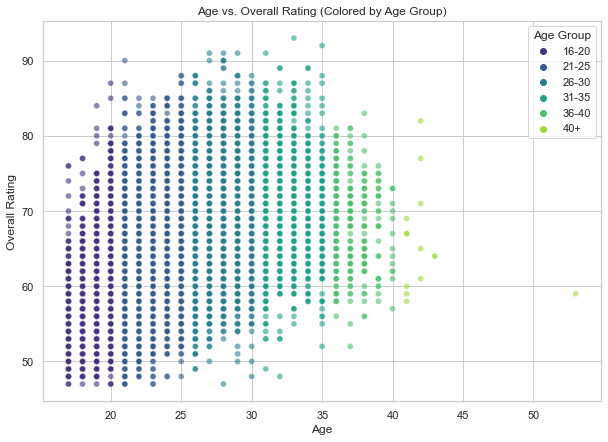

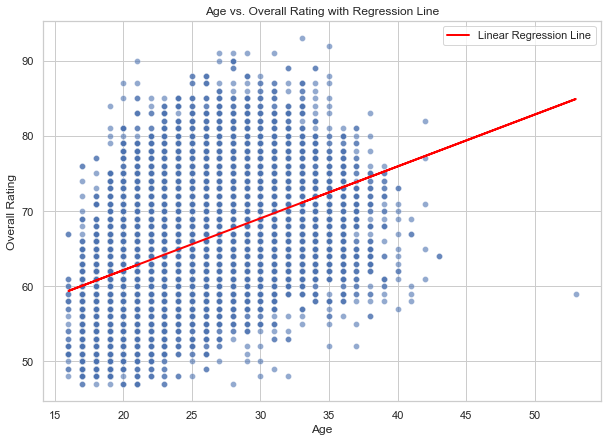


 Correlation Coefficient between Age and Overall Rating: 0.47 

 Age Group Descriptive Statistics 
╒═════════════╤═══════════════╤═══════════════════════╤══════════════════════╤══════════════════════╕
│ Age Group   │   num_players │   mean_overall_rating │   min_overall_rating │   max_overall_rating │
╞═════════════╪═══════════════╪═══════════════════════╪══════════════════════╪══════════════════════╡
│ 16-20       │          3470 │               59.2686 │                   47 │                   87 │
├─────────────┼───────────────┼───────────────────────┼──────────────────────┼──────────────────────┤
│ 21-25       │          6932 │               65.2927 │                   47 │                   90 │
├─────────────┼───────────────┼───────────────────────┼──────────────────────┼──────────────────────┤
│ 26-30       │          5745 │               68.4891 │                   47 │                   91 │
├─────────────┼───────────────┼───────────────────────┼──────────────────────┼──────

In [400]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate

age_bins = [16, 20, 25, 30, 35, 40, 100]  # Define age bins
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '40+']  # Labels for age bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)  # Use right=True

# 2. Visualize: Scatter plot of Age vs. Overall Rating with different age groups
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Overall Rating', hue='Age Group', palette='viridis', data=df, alpha=0.6)
plt.title('Age vs. Overall Rating (Colored by Age Group)')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.legend(title='Age Group', loc='upper right')
plt.grid(True)
plt.show()

# 3. Add a Regression Line (Linear Regression)
# Prepare data for regression
X = df[['Age']].dropna()  # Age column for X-axis
y = df['Overall Rating'].dropna()  # Overall Rating column for Y-axis

# Fit a Linear Regression Model
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y.values)

# Predict using the model
y_pred = model.predict(X.values.reshape(-1, 1))

# Visualize the regression line
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Overall Rating', data=df, alpha=0.6)
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Age vs. Overall Rating with Regression Line')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.legend()
plt.grid(True)
plt.show()

# 4. Statistical Analysis: Correlation Coefficient
correlation = df['Age'].corr(df['Overall Rating'])

# Print the correlation prominently
print("\n" + "=" * 60)
print(f" Correlation Coefficient between Age and Overall Rating: {correlation:.2f} ")
print("=" * 60)

# 5. Descriptive Statistics by Age Group (Modified)
# Aggregate the data to show number of players, mean, min, and max Overall Rating
age_group_stats = df.groupby('Age Group')['Overall Rating'].agg(
    num_players='size',  # Count the number of players
    mean_overall_rating='mean',  # Calculate mean rating
    min_overall_rating='min',    # Calculate minimum rating
    max_overall_rating='max'     # Calculate maximum rating
)

# Convert to a neat table and display
print("\n" + "=" * 60)
print(" Age Group Descriptive Statistics ")
print(tabulate(age_group_stats, headers="keys", tablefmt="fancy_grid"))
print("=" * 60)


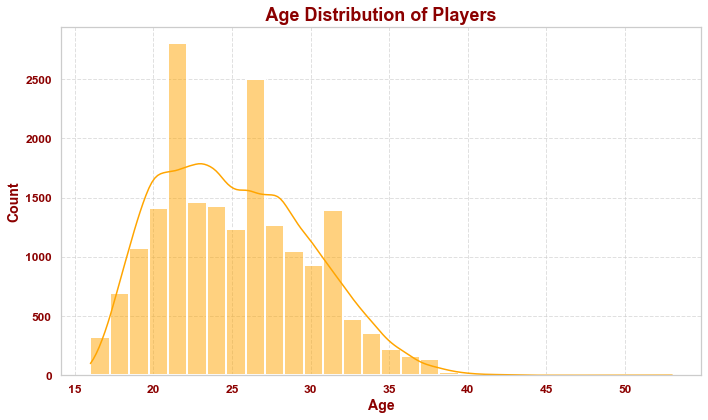

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a stylish theme for the plot
sns.set_theme(style="whitegrid", palette="coolwarm")

# Age distribution of players with more styling
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color="orange", linewidth=2)

# Adding a title with some flare
plt.title(' Age Distribution of Players ', fontsize=18, fontweight='bold', color='darkred')

# X and Y labels with improved font styling
plt.xlabel('Age', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkred')

# Customize the ticks to stand out
plt.xticks(fontsize=12, fontweight='bold', color='darkred')
plt.yticks(fontsize=12, fontweight='bold', color='darkred')

# Add a grid to give it a more modern feel
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot with more dynamic spacing
plt.tight_layout()

# Show the plot
plt.show()


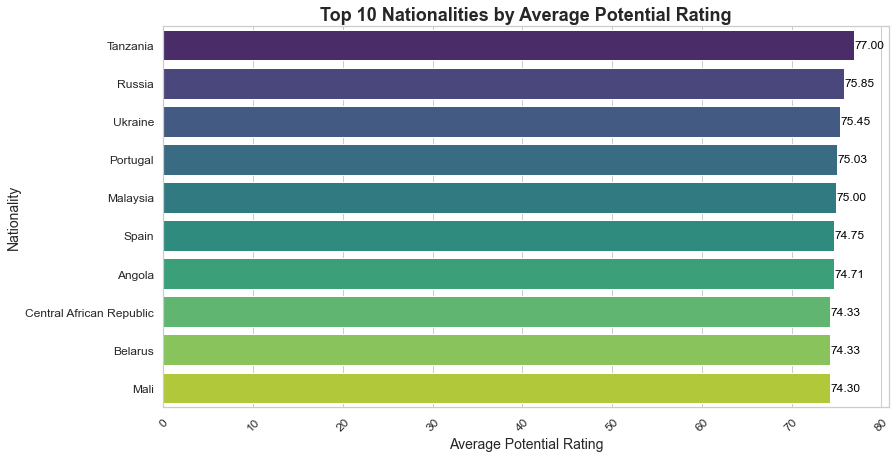

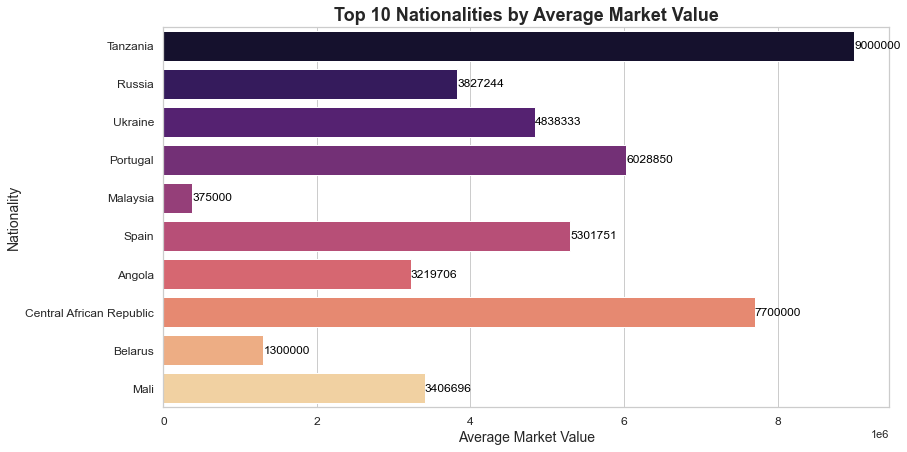

In [424]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Group by Nationality and calculate average Potential Rating and Market Value
nationality_analysis = df.groupby('Nationality')[['Potential Rating', 'Value']].mean().sort_values(by='Potential Rating', ascending=False)

# Visualize the Top 10 Nationalities by Average Potential Rating with horizontal bars
plt.figure(figsize=(13, 7))
sns.barplot(x=nationality_analysis['Potential Rating'][:10], y=nationality_analysis.index[:10], palette='viridis')
plt.title('Top 10 Nationalities by Average Potential Rating', fontsize=18, fontweight='bold')
plt.xlabel('Average Potential Rating', fontsize=14)
plt.ylabel('Nationality', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for index, value in enumerate(nationality_analysis['Potential Rating'][:10]):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black')
plt.show()

# Visualize the Top 10 Nationalities by Average Market Value with horizontal bars
plt.figure(figsize=(13, 7))
sns.barplot(x=nationality_analysis['Value'][:10], y=nationality_analysis.index[:10], palette='magma')
plt.title('Top 10 Nationalities by Average Market Value', fontsize=18, fontweight='bold')
plt.xlabel('Average Market Value', fontsize=14)
plt.ylabel('Nationality', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
for index, value in enumerate(nationality_analysis['Value'][:10]):
    plt.text(value + 0.1, index, f'{value:.0f}', va='center', ha='left', fontsize=12, color='black')  # Simplified value display
plt.show()


In [430]:
# Filter players with high Potential Rating but lower Overall Rating
underperforming_players = df[df['Potential Rating'] > df['Overall Rating']]

# Select relevant columns and sort by Potential Rating
underperforming_players = underperforming_players[['FullName', 'Overall Rating', 'Potential Rating', 'Age']].sort_values(by='Potential Rating', ascending=False)

# Display top 10 underperforming players
underperforming_players_top10 = underperforming_players.head(10)

# Print a neat table with pandas style (colorless)
styled_table = underperforming_players_top10.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},  # Header style (centered and bold)
     {'selector': 'tbody td', 'props': [('padding', '8px'), ('text-align', 'center')]},  # Body cell style (centered)
     {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},  # Table style
     {'selector': 'th', 'props': [('border', '1px solid #ddd')]},  # Table header border
     {'selector': 'td', 'props': [('border', '1px solid #ddd')]},  # Table body border
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'transparent')]},  # Alternating row color (transparent)
     {'selector': 'tbody tr:hover', 'props': [('background-color', 'transparent')]}  # Hover effect (transparent)
])

styled_table


,FullName,Overall Rating,Potential Rating,Age
8,Kylian Mbappé,90,95,21
2,Jan Oblak,91,93,27
29,Jadon Sancho,87,93,20
9,Marc-André ter Stegen,90,93,28
280,João Félix Sequeira,81,93,20
370,Vinícius José de Oliveira Júnior,80,93,19
65,Kai Havertz,85,93,21
69,Gianluigi Donnarumma,85,92,21
105,Erling Haaland,84,92,19
30,Trent Alexander-Arnold,87,92,21


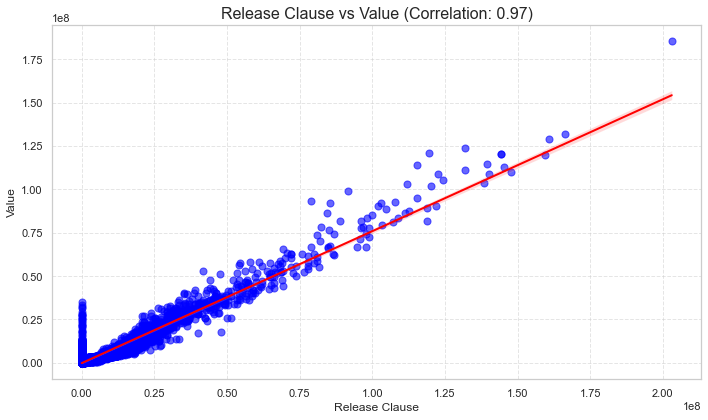

In [413]:
import numpy as np
from scipy.stats import pearsonr

# Calculate correlation coefficient
corr, _ = pearsonr(df['Release Clause'].dropna(), df['Value'].dropna())

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Release Clause', y='Value', data=df, scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})

# Title and labels
plt.title(f'Release Clause vs Value (Correlation: {corr:.2f})', fontsize=16)
plt.xlabel('Release Clause', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Show grid and style
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()


# beak

**Scatter PLot between Value and Wage**

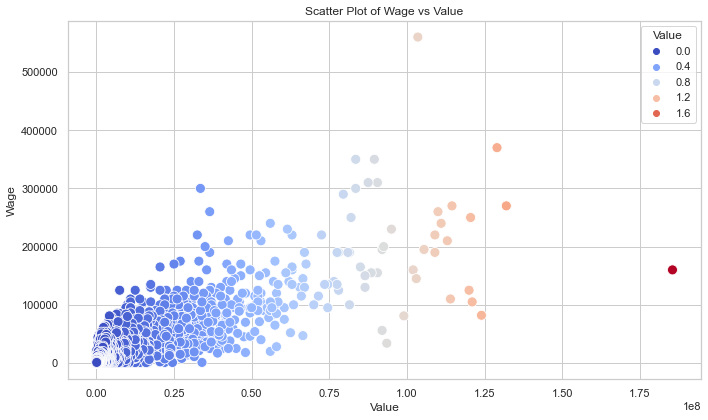

In [404]:
plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")

sns.scatterplot(data=df, x='Value', y='Wage', hue='Value', palette='coolwarm', s=100)

plt.xlabel('Value')
plt.ylabel('Wage')
plt.title('Scatter Plot of Wage vs Value')

plt.tight_layout()
plt.show()


**Players with High Value and Low Wage**

In [405]:
high_value_players = df[df['Value'] > 1.75e8]

columns_to_print = ['FullName', 'Nationality', 'Club', 'Joined', 'Value', 'Wage']
high_value_info = high_value_players[columns_to_print]

print(high_value_info.to_string(index=False))


     FullName Nationality                    Club     Joined       Value     Wage
Kylian Mbappé      France     Paris Saint-Germain 2018-07-01 185500000.0 160000.0


In [406]:

# Calculate z-scores
df['z_score'] = (df['Wage'] - df['Wage'].mean()) / df['Wage'].std()

# Count entries with z-score greater than 3
count_gt_3 = df[df['z_score'] > 3].shape[0]

print(f"Number of entries with z-score greater than 3: {count_gt_3}")

Number of entries with z-score greater than 3: 338


In [407]:

# Calculate z-scores
df['z_score'] = (df['Value'] - df['Value'].mean()) / df['Value'].std()

# Count entries with z-score greater than 3
count_gt_3 = df[df['z_score'] > 3].shape[0]

print(f"Number of entries with z-score greater than 3: {count_gt_3}")

Number of entries with z-score greater than 3: 367


In [408]:
df.columns

Index(['ID', 'FullName', 'Nationality', 'Age', 'Overall Rating',
       'Potential Rating', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Value', 'Wage',
       'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits', 'Year', 'Mon

In [409]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# from scipy.stats import zscore

# # Select relevant features and target variable
# features = ['Age', 'Potential Rating', 'Overall Rating', 'Wage', 'YearsOfService', 
#             'PAC', 'SHO', 'DEF', 'PHY']
# target = 'Value'  # Target variable

# # Handle missing values (example: filling with mean or dropping rows)
# df_cleaned = df.dropna(subset=features + [target]).copy()  # Ensure it's a fresh copy

# # Calculate z-scores for 'Value' column to detect outliers
# df_cleaned['Z_Score'] = zscore(df_cleaned['Value'])

# # Filter out the outliers (Z > 3 or Z < -3)
# df_cleaned = df_cleaned[df_cleaned['Z_Score'].abs() <= 3]

# # Apply log transformation to the target variable
# df_cleaned['LogValue'] = np.log1p(df_cleaned[target])

# # Prepare data
# X_cleaned = df_cleaned[features]
# y_cleaned = df_cleaned['LogValue']  # Using log-transformed target

# # Normalize numeric features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_cleaned)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)

# # Train the Random Forest Regressor
# model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=15, min_samples_split=4, min_samples_leaf=2)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred_log = model.predict(X_test)

# # Convert log-transformed predictions back to original scale
# y_pred = np.expm1(y_pred_log)  # Inverse of log1p

# # Evaluate the model
# r2 = r2_score(np.expm1(y_test), y_pred)  # Inverse of log1p for actual values
# mae = mean_absolute_error(np.expm1(y_test), y_pred)  # Inverse of log1p for actual values

# print("R² Score:", r2)
# print("Mean Absolute Error (MAE):", mae)


PAC – Pace: This measures the player's speed and acceleration. It's crucial for players who need to outrun opponents, such as wingers or strikers.

SHO – Shooting: This measures the player's ability to score goals, including factors like shot accuracy and power.

DEF – Defending: This measures a player's ability to block, intercept, and tackle the ball when defending. It's key for defenders, midfielders, and even strikers with defensive roles.

PHY – Physicality: This encompasses physical attributes like strength, jumping, stamina, and general robustness. It's important for all positions, especially defenders and midfielders.

In [410]:
# List of the features you're interested in (replace with the actual list of columns if needed)
features = ['Overall Rating', 'Potential Rating', 'Wage', 'Value', 'PAC', 'SHO', 'DEF', 'PHY']

# 1. Calculate the overall mean of each feature in the entire dataset
overall_mean = df[features].mean()

# 2. Calculate the mean of each feature within each cluster
cluster_means = df.groupby('Cluster')[features].mean()

# 3. Print the results
print("Overall Mean of Each Feature:\n", overall_mean)




KeyError: 'Cluster'

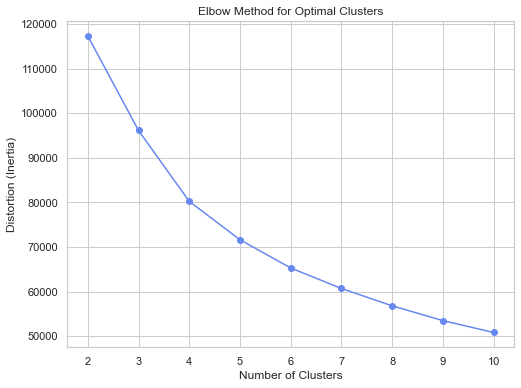

╒════╤═══════════╤══════════════════╤════════════════════╤═══════════╤═════════════╤═══════╤═══════╤═══════╤═══════╕
│    │   Cluster │   Overall Rating │   Potential Rating │      Wage │       Value │   PAC │   SHO │   DEF │   PHY │
╞════╪═══════════╪══════════════════╪════════════════════╪═══════════╪═════════════╪═══════╪═══════╪═══════╪═══════╡
│  0 │      0.00 │            63.95 │              69.21 │   3873.97 │   954098.63 │ 61.17 │ 39.85 │ 61.96 │ 67.79 │
├────┼───────────┼──────────────────┼────────────────────┼───────────┼─────────────┼───────┼───────┼───────┼───────┤
│  1 │      1.00 │            72.13 │              75.54 │  16151.23 │  4730167.18 │ 72.90 │ 63.61 │ 53.35 │ 69.40 │
├────┼───────────┼──────────────────┼────────────────────┼───────────┼─────────────┼───────┼───────┼───────┼───────┤
│  2 │      2.00 │            61.03 │              68.44 │   2466.47 │   689480.55 │ 68.28 │ 56.76 │ 34.87 │ 56.41 │
├────┼───────────┼──────────────────┼────────────────────┼──────

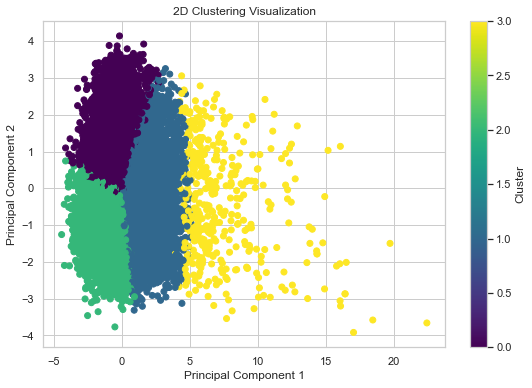

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from tabulate import tabulate

# # Feature selection for clustering
# features = ['Overall Rating', 'Potential Rating', 'Wage', 'Value', 'PAC', 'SHO', 'DEF', 'PHY']

# # Select relevant features
# X = df[features]

# # Scale the features to normalize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Find the optimal number of clusters using the Elbow Method
# distortions = []
# for k in range(2, 11):  # Testing for 2 to 10 clusters
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
#     kmeans.fit(X_scaled)
#     distortions.append(kmeans.inertia_)


# plt.figure(figsize=(8, 6))  # Adjust width and height as needed

# # Plot the Elbow Curve
# plt.plot(range(2, 11), distortions, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Distortion (Inertia)')
# plt.title('Elbow Method for Optimal Clusters')
# plt.show()

# # Based on the Elbow method, select the number of clusters (e.g., 4 clusters)
# optimal_clusters = 4
# kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # Set n_init explicitly

# # Fit the KMeans model
# df['Cluster'] = kmeans.fit_predict(X_scaled)

# # Check cluster distribution and mean of features within each cluster
# cluster_summary = df.groupby('Cluster')[features].mean()

# # Format the output using tabulate
# headers = ['Cluster', 'Overall Rating', 'Potential Rating', 'Wage', 'Value', 'PAC', 'SHO', 'DEF', 'PHY']
# formatted_table = tabulate(cluster_summary.reset_index(), headers=headers, tablefmt='fancy_grid', floatfmt=".2f")

# # Print the formatted table with advanced grid and neat lines
# print(formatted_table)

# # Optionally: Visualize the clusters using 2D plotting (using PCA or first two components)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(9, 6))  # Adjust width and height as needed


# # Plot clusters
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('2D Clustering Visualization')
# plt.colorbar(label='Cluster')
# plt.show()



 Conclusion:

Cluster 0: Represents low-performing, budget-friendly players with lower wages and value.

Cluster 1: Represents high-performing players with above-average ratings, high wages, and value.

Cluster 2: Represents mid-range players with average ratings, value, and wages.

Cluster 3: Represents elite players with top ratings, very high wages, and value.

These clusters help segment players into distinct groups based on their performance, financial traits, and market value, providing insights for player recruitment and team-building strategies

In [322]:
df['Value'].mean()

2865062.91163918

In [ ]:
df['Wage'].mean()

9092.0622793614

In [316]:
specific_nationalities = ['Egypt', 'France', 'Germany', 'Netherlands', 'Spain',
                          'England', 'Scotland','Italy', 'Switzerland', 'Serbia',
                          'Morocco', 'Algeria', 'Denmark', 'Hungary', 'Nigeria',
                          'Norway', 'Mexico', 'Austria', 'Albania', 'Colombia',
                          'Greece', 'Finland', 'Sweden']

filtered_df = df[df['Nationality'].isin(specific_nationalities)]

nationality_stats = filtered_df.groupby('Nationality').agg({
    'Age': 'mean', 'Value': 'mean', 'Wage': 'mean',
    'Height': 'mean', 'Total Stats': 'mean', 'Hits': 'mean'
}).reset_index()

fig = px.bar(
    nationality_stats,
    x='Nationality',
    y='Value',
    text='Nationality',
    hover_data=['Age', 'Value', 'Wage', 'Total Stats', 'Height', 'Hits'],
    title='Average Attributes by Nationality',
    labels={'Value': 'Average Value'},
    color='Nationality',
    template='plotly_dark'
)

fig.update_layout(
    xaxis_title='Nationality',
    yaxis_title='Average Value',
    font=dict(family='Arial', size=12),
    xaxis_tickangle=-45,
    yaxis_range=[100000, 2500000],
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    showlegend=False
)

fig.show()


**Analysis of 'Best Position'**

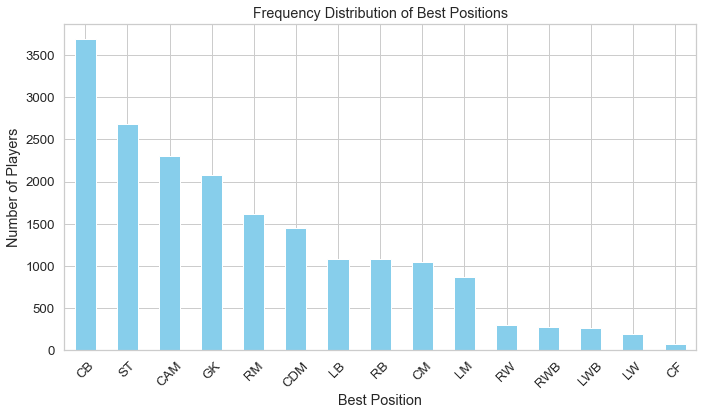

In [317]:
position_counts = df['Best Position'].value_counts()

plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Best Position')
plt.ylabel('Number of Players')
plt.title('Frequency Distribution of Best Positions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Compare 'Total Stats' against specific attributes related to a player's position**

**Analyzing whether younger players tend to have lower 'Total Stats' compared to older, more experienced players.**

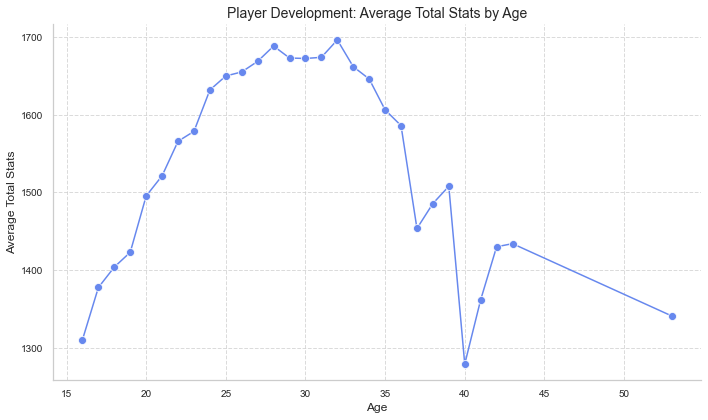

Age group with highest average Total Stats:
Age              32.000000
Total Stats    1695.955414
Name: 16, dtype: float64


In [319]:
age_grouped = df.groupby('Age')['Total Stats'].mean().reset_index()

sns.set(style="whitegrid")
sns.set_palette("coolwarm")

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_grouped, x='Age', y='Total Stats', marker='o', markersize=8)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Total Stats', fontsize=12)
plt.title('Player Development: Average Total Stats by Age', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()

plt.show()


# Group data by age and calculate average Total Stats
age_grouped = df.groupby('Age')['Total Stats'].mean().reset_index()

highest_avg_age = age_grouped.loc[age_grouped['Total Stats'].idxmax()]

print("Age group with highest average Total Stats:")
print(highest_avg_age)


In [320]:
# df.to_csv('cleaned_fifa.csv', index=False)